# Analizando dados de musicas do Spotify

* SVM aplicado na classificação de músicas do Spotify.
* O SVM será utilizado para criação de classificador que identifica possíveis músicas que um usuário poderia gostar.
* Iremos treinar o algoritmo, validar o modelo e fazer tunning dos parâmetros do SVM.

In [1]:
#importação das bibliotecas utilizadas
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm

In [2]:
#carregando o dataset
dataset = pd.read_csv('data.csv')

In [3]:
#visualizando as primeiras linhas do dataset
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
#verificando se a base possui dados faltantes
dataset.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [5]:
#verificando informações das features da base
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
id                  2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [6]:
#resumo estatistico da base
dataset.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
#verificando os stilos disponiveis da biblioteca matplotlib
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

<IPython.core.display.Javascript object>


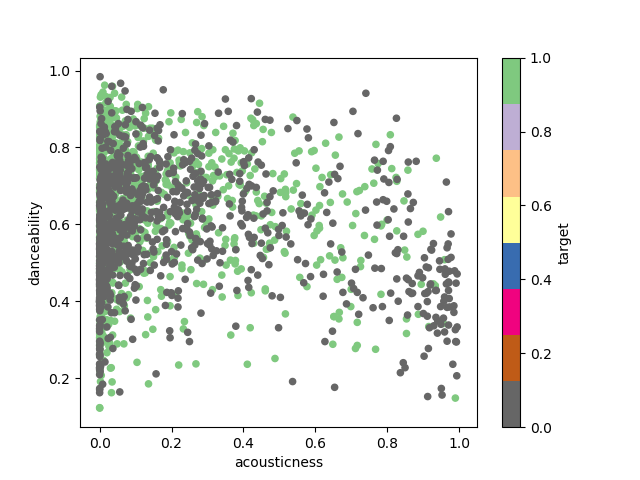

In [8]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='acousticness', y='danceability', c='target', kind='scatter', colormap='Accent_r')

<IPython.core.display.Javascript object>


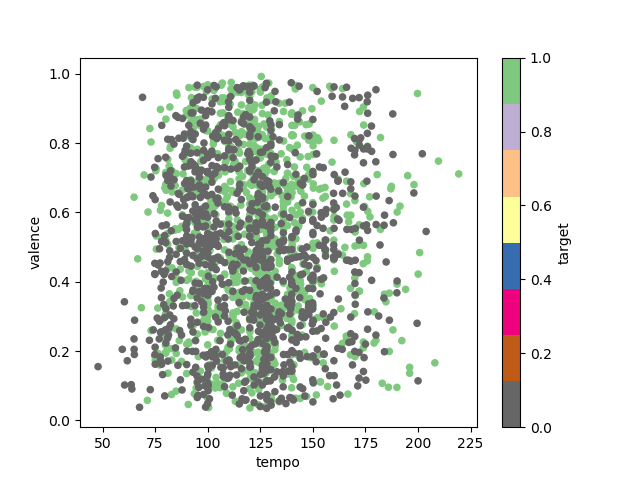

In [35]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='valence', c='target', kind='scatter' , colormap='Accent_r')

<IPython.core.display.Javascript object>


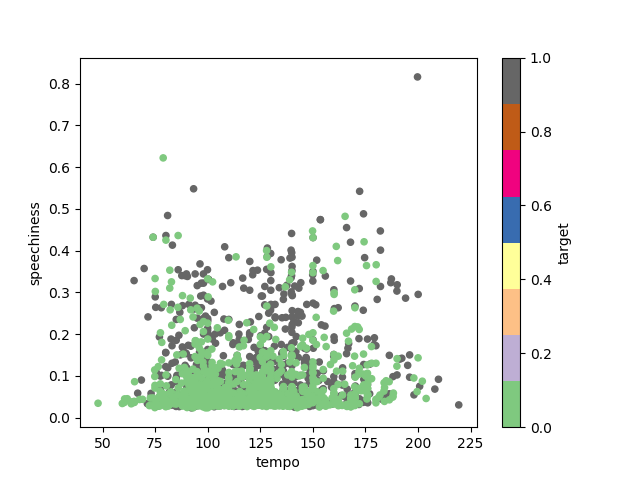

In [9]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='tempo', y='speechiness', c='target', kind='scatter' , colormap='Accent')

<IPython.core.display.Javascript object>


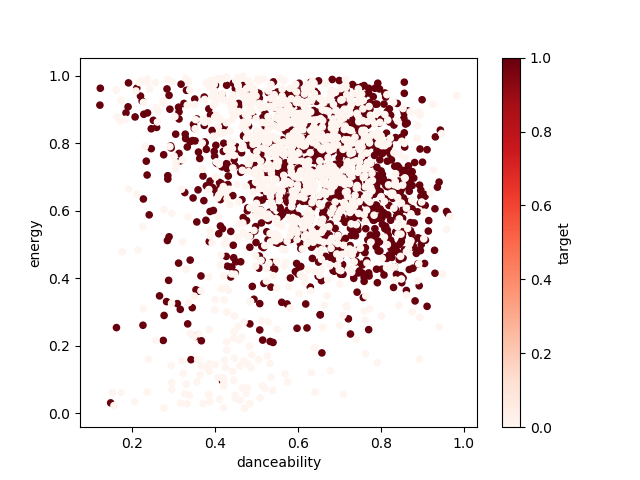

In [80]:
%matplotlib notebook
from matplotlib import style
style.use("seaborn-colorblind")
dataset.plot(x='danceability', y='energy', c='target', kind='scatter' , colormap='Reds')

In [10]:
#separando os dados da classe
classes = dataset['target']

In [11]:
#apagando os valores da classe
dataset.drop('target', axis=1, inplace=True)

In [12]:
dataset.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys


In [13]:
classes

0       1
1       1
2       1
3       1
4       1
       ..
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, Length: 2017, dtype: int64

In [14]:
#remove colunas do dataset
def remove_features(list_features):
    for i in list_features:
        dataset.drop(i, axis=1, inplace=True)
    return 0    

In [15]:
remove_features(['id','song_title'])

0

In [16]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 14 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
artist              2017 non-null object
dtypes: float64(10), int64(3), object(1)
memory usage: 220.7+ KB


# Usando Label Encoder

In [18]:
#importando o LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [19]:
# pegando uma instancia do LabelEncoder
enc = LabelEncoder()

In [20]:
#transfomando os nomes de artistas em codigos inteiros
inteiros = enc.fit_transform(dataset['artist'])

In [21]:
#set - visualiza valores unicos
set(inteiros)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [22]:
#criando uma nova colunas no dataset
dataset['artist_inteiros'] = inteiros

In [23]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys,628


In [24]:
#removendo a coluna artistas
remove_features(['artist'])

0

In [25]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist_inteiros
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,449
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,222
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,449
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,95
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,628


In [26]:
dataset.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
artist_inteiros       int32
dtype: object

## One Hot Econding

In [29]:
#Importa o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
#Pegando uma Instancia do OneHotEncoder
ohe = OneHotEncoder()

In [31]:
# dataset.values - Transforma o dataset em uma array numpy
dataset_array = dataset.values

In [32]:
#pega o numero de linhas do dataset
num_rows = dataset_array.shape[0]

In [33]:
dataset_array[:][:,13]

array([ 449.,  222.,  449., ...,  947., 1242.,  132.])

In [34]:
#Transforma a matriz em uma dimensão
inteiros = inteiros.reshape(len(inteiros),1)

In [35]:
#cria novas features a partir da matriz de presença 
novas_features = ohe.fit_transform(inteiros)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [36]:
novas_features

<2017x1343 sparse matrix of type '<class 'numpy.float64'>'
	with 2017 stored elements in Compressed Sparse Row format>

In [37]:
#concatena as novas features ao array
dataset_array = np.concatenate([dataset_array, novas_features.toarray()], axis=1)

In [38]:
dataset_array.shape

(2017, 1357)

In [39]:
dataf = pd.DataFrame(dataset_array)

In [40]:
dataf.head()

,0,1,2,3,4,5,6,7,8,9,...,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356
0,0.0102,0.833,204600.0,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1990,0.743,326933.0,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0344,0.838,185707.0,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.6040,0.494,199413.0,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1800,0.678,392893.0,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Usando Get_dummies

In [44]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,Junior Boys


# Aplicando get_dummies nos dados

In [9]:
dataset = pd.get_dummies(dataset, columns=['artist'], prefix=['artist'])

In [46]:
dataset.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness',
       ...
       'artist_alt-J', 'artist_deadmau5', 'artist_for KING & COUNTRY',
       'artist_one sonic society', 'artist_tUnE-yArDs', 'artist_tobyMac',
       'artist_권나무 Kwon Tree', 'artist_도시총각 Dosichonggak',
       'artist_카우칩스 The CowChips', 'artist_플랫핏 Flat Feet'],
      dtype='object', length=1356)

In [47]:
#verificando a quatidade de colunas
len(dataset.columns)

1356

In [48]:
#verificando tipo dos dados apos aplicar o get_dummies
dataset.dtypes

acousticness                float64
danceability                float64
duration_ms                   int64
energy                      float64
instrumentalness            float64
                             ...   
artist_tobyMac                uint8
artist_권나무 Kwon Tree          uint8
artist_도시총각 Dosichonggak      uint8
artist_카우칩스 The CowChips      uint8
artist_플랫핏 Flat Feet          uint8
Length: 1356, dtype: object

In [49]:
dataset.isnull().sum()

acousticness                0
danceability                0
duration_ms                 0
energy                      0
instrumentalness            0
                           ..
artist_tobyMac              0
artist_권나무 Kwon Tree        0
artist_도시총각 Dosichonggak    0
artist_카우칩스 The CowChips    0
artist_플랫핏 Flat Feet        0
Length: 1356, dtype: int64

In [50]:
dataset.values[:][:,13]

array([0., 0., 0., ..., 0., 0., 0.])

In [51]:
dataset.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,artist_alt-J,artist_deadmau5,artist_for KING & COUNTRY,artist_one sonic society,artist_tUnE-yArDs,artist_tobyMac,artist_권나무 Kwon Tree,artist_도시총각 Dosichonggak,artist_카우칩스 The CowChips,artist_플랫핏 Flat Feet
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,...,0,0,0,0,0,0,0,0,0,0
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,...,0,0,0,0,0,0,0,0,0,0
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,...,0,0,0,0,0,0,0,0,0,0
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,...,0,0,0,0,0,0,0,0,0,0
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,...,0,0,0,0,0,0,0,0,0,0


## Usando Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder

In [62]:
pip_1 = Pipeline([
    ('ohe', OneHotEncoder()),
    ('std', StandardScaler()),
    ('svm',svm.SVC(kernel='rbf')) 
])

In [63]:
pip_1.steps

[('ohe', OneHotEncoder(cols=None, drop_invariant=False, handle_missing='value',
                handle_unknown='value', return_df=True, use_cat_names=False,
                verbose=0)),
 ('std', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False))]

In [48]:
x_train, x_test, y_train, y_test = train_test_split(dataset, classes)

In [119]:
pip_1.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['artist'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [121]:
acuracia = pip_1.score(x_test, y_test)

In [122]:
acuracia

0.6673267326732674

### Usando Cross Validation

In [64]:
score = cross_val_predict(pip_1, dataset, classes, cv =10)

In [65]:
score.mean()

0.8998512642538423